In [ ]:
import numpy as np 

#### Exercice 0 : S'échauffer
Créez un tableau NumPy de valeurs de 0 à 2π divisé en 100 parties.
Calculez le sinus et le cosinus de ces valeurs.
Utilisez `np.round()` pour arrondir les résultats à 2 décimales.


In [ ]:
tab = np.linspace(1, 2 * np.pi, 100)

In [ ]:
tab_cos = np.cos(tab).round(2)
tab_cos

In [ ]:
tab_sin = np.sin(tab).round(2)
tab_sin

### Exercice 1 : Le Jeu du Bingo
Créez un programme qui génère une carte de bingo 5x5 où chaque cellule contient un nombre aléatoire unique entre 1 et 75.

Ensuite, simulez le tirage de numéros aléatoires entre 1 et 75 et marquez les numéros sur votre carte de bingo. 

Le but est de voir combien de tirages sont nécessaires pour compléter une ligne ou une colonne.

In [1]:
# Importation des modules nécessaires
import random
import numpy as np 

def bingo():
    # Création d'une carte de bingo de 5x5 avec des nombres aléatoires uniques de 1 à 75
    carte_bingo = np.array(random.sample(range(1, 76), 25)).reshape(5, 5)
    
    # Initialisation d'un ensemble pour conserver les numéros tirés
    numeros_tires = set()

    # Compteur pour le nombre de tirages
    n_tirage = 1

    # Boucle infinie pour simuler le jeu de bingo
    while(True):        
        # Tirage de 5 nombres aléatoires uniques de 1 à 75
        tirage_nombres = set(random.sample(range(1, 76), 5))

        # Mise à jour de l'ensemble des numéros tirés
        numeros_tires.update(tirage_nombres)
    
        # Mise à jour de la carte de bingo, en remplaçant les numéros tirés par '*'
        carte_bingo_updated = [['*' if num in numeros_tires else num for num in row] for row in carte_bingo]
        carte_bingo_updated = np.array(carte_bingo_updated)  

        # Vérification de l'achèvement d'une colonne
        colonne_full = np.sum(carte_bingo_updated == "*", axis=0)
        if 5 in colonne_full:
            print(f" Nombre de tirage :{n_tirage}")
            print("Une colonne complétée")
            break

        # Vérification de l'achèvement d'une ligne
        ligne_full = np.sum(carte_bingo_updated == "*", axis=1)
        if 5 in ligne_full:
            print(f" Nombre de tirage :{n_tirage}")
            print("Une ligne complétée")
            break

        # Incrémentation du compteur de tirage
        n_tirage += 1

    # Retour de la carte de bingo mise à jour
    return carte_bingo_updated

# Appel de la fonction bingo pour lancer le jeu
bingo()


 Nombre de tirage :10
Une ligne complétée


array([['*', '44', '9', '45', '*'],
       ['29', '2', '*', '30', '6'],
       ['*', '*', '*', '23', '*'],
       ['*', '*', '*', '*', '*'],
       ['*', '54', '*', '47', '36']], dtype='<U11')

### Exercice 2 : Le Puzzle des Pixels
Imaginez un tableau NumPy 10x10 rempli de zéros. 

Écrivez un programme qui change la couleur (valeur) de pixels aléatoires pour créer un motif ou une image.

Vous pouvez par exemple essayer de créer un motif en damier.



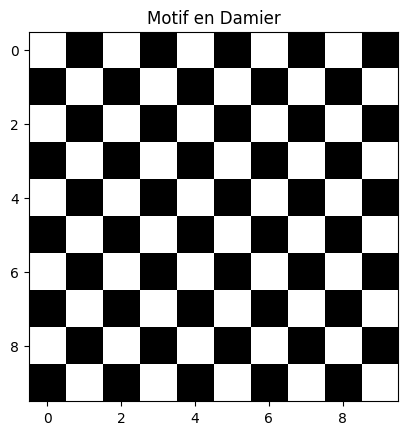

In [1]:
# Importation des modules nécessaires
import random           # Importe le module 'random' pour générer des nombres aléatoires (non utilisé dans ce code)
import numpy as np      # Importe le module 'numpy' pour les opérations sur les tableaux

###### OPTIONNEL
import matplotlib.pyplot as plt  # Importe le module 'matplotlib.pyplot' pour la visualisation de données

# Créer un tableau NumPy 10x10 rempli de zéros
tableau = np.zeros((10, 10), dtype=int)  # Initialise un tableau 10x10 avec des zéros, en spécifiant un type de données entier

# Créer un motif en damier
for i in range(tableau.shape[0]):        # Boucle sur les lignes du tableau
    for j in range(tableau.shape[1]):    # Boucle sur les colonnes du tableau
        if (i + j) % 2 == 0:            # Vérifie si la somme des indices de ligne et de colonne est divisible par 10
            tableau[i, j] = 1            # Si vrai, change la valeur du pixel en 1 pour créer un motif

# Afficher le tableau avec le motif en damier
tableau_damier = tableau                 # Assignation du tableau modifié à une nouvelle variable (optionnel)
tableau_damier                           # Affiche le tableau en sortie (utile dans un environnement de notebook)

###### OPTIONNEL
# Utiliser matplotlib pour afficher le tableau en damier comme une image
plt.imshow(tableau_damier, cmap='gray')  # Utilise 'imshow' pour afficher le tableau sous forme d'image, avec une carte des couleurs en gris
plt.title("Motif en Damier")             # Ajoute un titre à l'image
plt.show()                               # Affiche l'image

### Exercice 3 : Le Labyrinthe

Objectif : Créer un jeu de labyrinthe où le joueur doit naviguer à travers pour atteindre une sortie.

### 1. Fonction : `generer_labyrinthe()`
- Initialise un tableau NumPy `taille x taille` rempli de `'X'` (représentant les murs).
- Pour chaque cellule, utilise un nombre aléatoire (`np.random.rand()`) pour décider de la laisser comme un mur ou de la rendre vide. Le seuil utilisé ici est `0.3`.
- Définit le coin inférieur droit (`[taille-1, taille-1]`) comme sortie, marqué par `'>'`.
- Définit le coin supérieur gauche (`[0, 0]`) comme position de départ, marqué par `'*'`.

### 2. Fonction : `position_joueur()`
- Utilise `np.argwhere` pour trouver les coordonées de la cellule contenant le symbole `'*'`, qui représente le joueur.
- Renvoie les coordonnées du joueur sous forme de tuple (`y, x`). Si le joueur n'est pas trouvé, renvoie `None`.

### 3. Fonction : `mouvement()`

- Entre dans une boucle `while True` pour accepter continuellement les commandes de mouvement de l'utilisateur.
- Accepte l'entrée de l'utilisateur pour la direction du mouvement (`'h'`, `'b'`, `'g'`, `'d'` correspondant à haut, bas, gauche, droite).
- Récupère la position actuelle du joueur.
- Vérifie si le mouvement souhaité est valide (c'est-à-dire à l'intérieur des limites du labyrinthe et pas dans un mur `'X'`).
- Si valide, met à jour la position du joueur en effaçant l'ancienne position et en définissant la nouvelle position avec `'*'`.
- Vérifie si le joueur a atteint la sortie (`[taille-1, taille-1]`). Si c'est le cas, affiche un message de félicitations et interrompt la boucle, mettant fin au jeu.
- Affiche le labyrinthe mis à jour après chaque mouvement.

In [12]:
import numpy as np

def generer_labyrinthe(taille):

    labyrinthe = np.full((taille, taille), 'X')
    
    for i in range(taille):
        for j in range(taille):
            if np.random.rand() > 0.3: # tirage au sort d'une valeur entre 0 et 1 
                labyrinthe[i, j] = ' ' # si superieur à 0.3 alors true
    labyrinthe[taille-1, taille-1] = '>'
    labyrinthe[0, 0] = '*'

    return labyrinthe


# trouver la position actuelle du joueur
# renvoie un tuple 
def position_joueur(lab):
    joueur = np.argwhere(lab == "*")
    return joueur[0] if joueur.size else None

def mouvement(lab, taille):
    while True:
        choix = input("Choose direction (h/b/g/d): ")  # h: haut, b: bas, g: gauche, d: droite
        
        pos = position_joueur(lab)
        if pos is None:
            return "Player not found in labyrinth"

        # coordonnés de position
        y, x = pos

        if choix == 'h' and y > 0 and lab[y-1, x] != "X":
            lab[y, x] = " "  
            y -= 1  
        elif choix == 'b' and y < lab.shape[0] - 1 and lab[y+1, x] != "X":
            lab[y, x] = " "
            y += 1
        elif choix == 'g' and x > 0 and lab[y, x-1] != "X":
            lab[y, x] = " "
            x -= 1
        elif choix == 'd' and x < lab.shape[1] - 1 and lab[y, x+1] != "X":
            lab[y, x] = " "
            x += 1
        else:
            print("Mouvement invalide. Veuillez recommencer.")
            continue

        lab[y, x] = "*"  #Nouvelle position

        # Atteinte de la sortie ?
        if y == taille - 1 and x == taille - 1:
            print("Félicitations ! Vous avez trouvé la sortie.")
            break
        
        print(lab)
        
    return lab


In [37]:
# Example usage
taille = 5
labi = generer_labyrinthe(taille)
print(labi)
mouvement(labi, taille)

[['*' ' ' ' ' 'X' ' ']
 ['X' ' ' ' ' ' ' 'X']
 ['X' ' ' 'X' ' ' ' ']
 [' ' ' ' ' ' 'X' ' ']
 ['X' ' ' 'X' ' ' '>']]


### Exercice 4 : Simulation de Population
Créez un tableau NumPy pour représenter un espace 2D où chaque cellule peut être vide ou contenir une créature. 

Les créatures peuvent se déplacer, se reproduire ou mourir en fonction de règles simples que vous définissez.

Par exemple, imaginons que chaque creature tire une lettre:
- "d" elle se déplace dans une case random et disponible (sans autre créature).
- "r" elle se reproduit et sa valeur augmente de "+1"
- "m" elle meurt sur le champs


In [2]:
import numpy as np
import random

# Initialisation du tableau 2D
taille = 5
tableau = np.zeros((taille, taille), dtype=int)

# Placer quelques créatures au hasard
nombre_creatures = 5
for _ in range(nombre_creatures):
    x, y = np.random.randint(0, taille, size=2)
    tableau[x, y] = 1  # Créature de base représentée par 1

tableau

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [3]:
def mettre_a_jour_tableau(tableau):
    taille = tableau.shape[0]
    actions = ['d', 'r', 'm']
    nouveau_tableau = np.copy(tableau)

    for x in range(taille):
        for y in range(taille):
            if tableau[x, y] > 0:  # Si la cellule contient une créature
                action = random.choice(actions)

                if action == 'd':  # Déplacement
                    # Trouver une case vide
                    cases_vides = np.argwhere(nouveau_tableau == 0)
                    if len(cases_vides) > 0:
                        nouvelle_position = random.choice(cases_vides)
                        nouveau_tableau[nouvelle_position[0], nouvelle_position[1]] = nouveau_tableau[x, y]
                        nouveau_tableau[x, y] = 0

                elif action == 'r':  # Reproduction
                    nouveau_tableau[x, y] += 1

                elif action == 'm':  # Mort
                    nouveau_tableau[x, y] = 0

    return nouveau_tableau

# Mettre à jour le tableau pour une itération
tableau_apres_mise_a_jour = mettre_a_jour_tableau(tableau)
tableau_apres_mise_a_jour

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

### Exercice 5 : Analyse de Données de Ventes
Imaginez que vous avez des données de ventes pour différents produits. 

Les données sont représentées dans un tableau NumPy où chaque ligne est un produit et chaque colonne une semaine de vente. 

Calculez des statistiques comme les ventes moyennes, le produit le plus vendu, la semaine avec les ventes maximales, etc.


In [ ]:
# Création d'un tableau fictif de données de ventes
np.random.seed(0)  # Pour la reproductibilité
ventes = np.random.randint(0, 100, (5, 4))  # 5 produits, 4 semaines

# Calcul des statistiques
ventes_moyennes_par_produit = np.mean(ventes, axis=1)
ventes_moyennes_par_semaine = np.mean(ventes, axis=0)
produit_le_plus_vendu = np.argmax(np.sum(ventes, axis=1))
semaine_avec_ventes_maximales = np.argmax(np.sum(ventes, axis=0))

ventes, ventes_moyennes_par_produit, ventes_moyennes_par_semaine, produit_le_plus_vendu, semaine_avec_ventes_maximales


### Exercice 6 : Le Morpion
Programmez un jeu de morpion simple où deux joueurs entrent leurs coups à tour de rôle. 

Utilisez un tableau NumPy pour représenter le plateau de jeu (3x3) et 

vérifiez l'état du jeu après chaque coup pour déterminer le gagnant.


In [1]:
def initialiser_plateau():
    """Initialise le plateau de jeu."""
    return np.zeros((3, 3), dtype=int)

def coup_valide(plateau, ligne, colonne):
    """Vérifie si un coup est valide."""
    return 0 <= ligne < 3 and 0 <= colonne < 3 and plateau[ligne, colonne] == 0

def jouer_coup(plateau, joueur, ligne, colonne):
    """Joue un coup sur le plateau."""
    if coup_valide(plateau, ligne, colonne):
        plateau[ligne, colonne] = joueur
        return True
    return False

def verifier_gagnant(plateau):
    """Vérifie si un joueur a gagné."""
    # Vérifier les lignes, colonnes et diagonales
    for i in range(3):
        if (plateau[i, :].sum() == 3) or (plateau[:, i].sum() == 3):
            return 1  # Joueur 1 gagne
        if (plateau[i, :].sum() == 6) or (plateau[:, i].sum() == 6):
            return 2  # Joueur 2 gagne
    
    # Diagonales
    if (plateau.trace() == 3) or (np.fliplr(plateau).trace() == 3):
        return 1  # Joueur 1 gagne
    if (plateau.trace() == 6) or (np.fliplr(plateau).trace() == 6):
        return 2  # Joueur 2 gagne

    # Pas de gagnant
    return 0

def plateau_plein(plateau):
    """Vérifie si le plateau est plein."""
    return not (plateau == 0).any()

# Initialisation du plateau de jeu
plateau = initialiser_plateau()
plateau, coup_valide(plateau, 1, 1), jouer_coup(plateau, 1, 1, 1), verifier_gagnant(plateau), plateau_plein(plateau)


NameError: name 'np' is not defined